### Bike Sharing Demand Assignment

#### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

Importing libraries required to build the model

In [2]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

Reading and displaying the day.csv content for our analysis

In [3]:
bike = pd.read_csv('C:\ML\day.csv')
 
# displaying the contents of the CSV file
print(bike)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0      

In [4]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect all the aspects of the bike dataframe

In [5]:
bike.shape

(730, 16)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### From the above describe function, The difference between mean and median is not much for all the columns, we can conclude that data has no outliers and it looks cleaner for our analysis

### Data Quality Check  - Checking for NULL/MISSING values & Finding Duplicate values

#### Inference : 1. No missing/NULL values found - Data looks good for our analysis. Please refer analysis below for details.
#### Inference : 2. Duplicate values are not present - Data looks good for our analysis. Please refer analysis below for details.

In [8]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
# percentage of missing values in each row
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [10]:
#### Checking for duplicate values

bike_dup = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

### Data Cleaning - Checking value_counts() for entire dataframe.

#### This will help to identify any Unknown/Unwanted values present in the dataset.

#### Create a copy of the dataframe, without the 'instant' column,as this will have unique values, and donot make sense to do a value count on it.

#### Inferences: There seems to be no Unknown/Unwanted values in the entire dataset. Please refer to analysis below

In [11]:
bike_dummy=bike.iloc[:,1:16]

for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 



1    499
0    231
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 



32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625

### Removing redundant & unwanted columns


Based on the high level look at the data and the data dictionary, the following variables can't be cosnidered from further analysis:

instant : Its only an index value , we have a default index for the same purpose

dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we can carry out our analysis without this column.

casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

We will save the new dataframe as bike_demand, so that the original dataset bike is preserved for any future analysis/validation

In [12]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Step 2: Visualising the Data

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
bike_demand = bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

bike_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

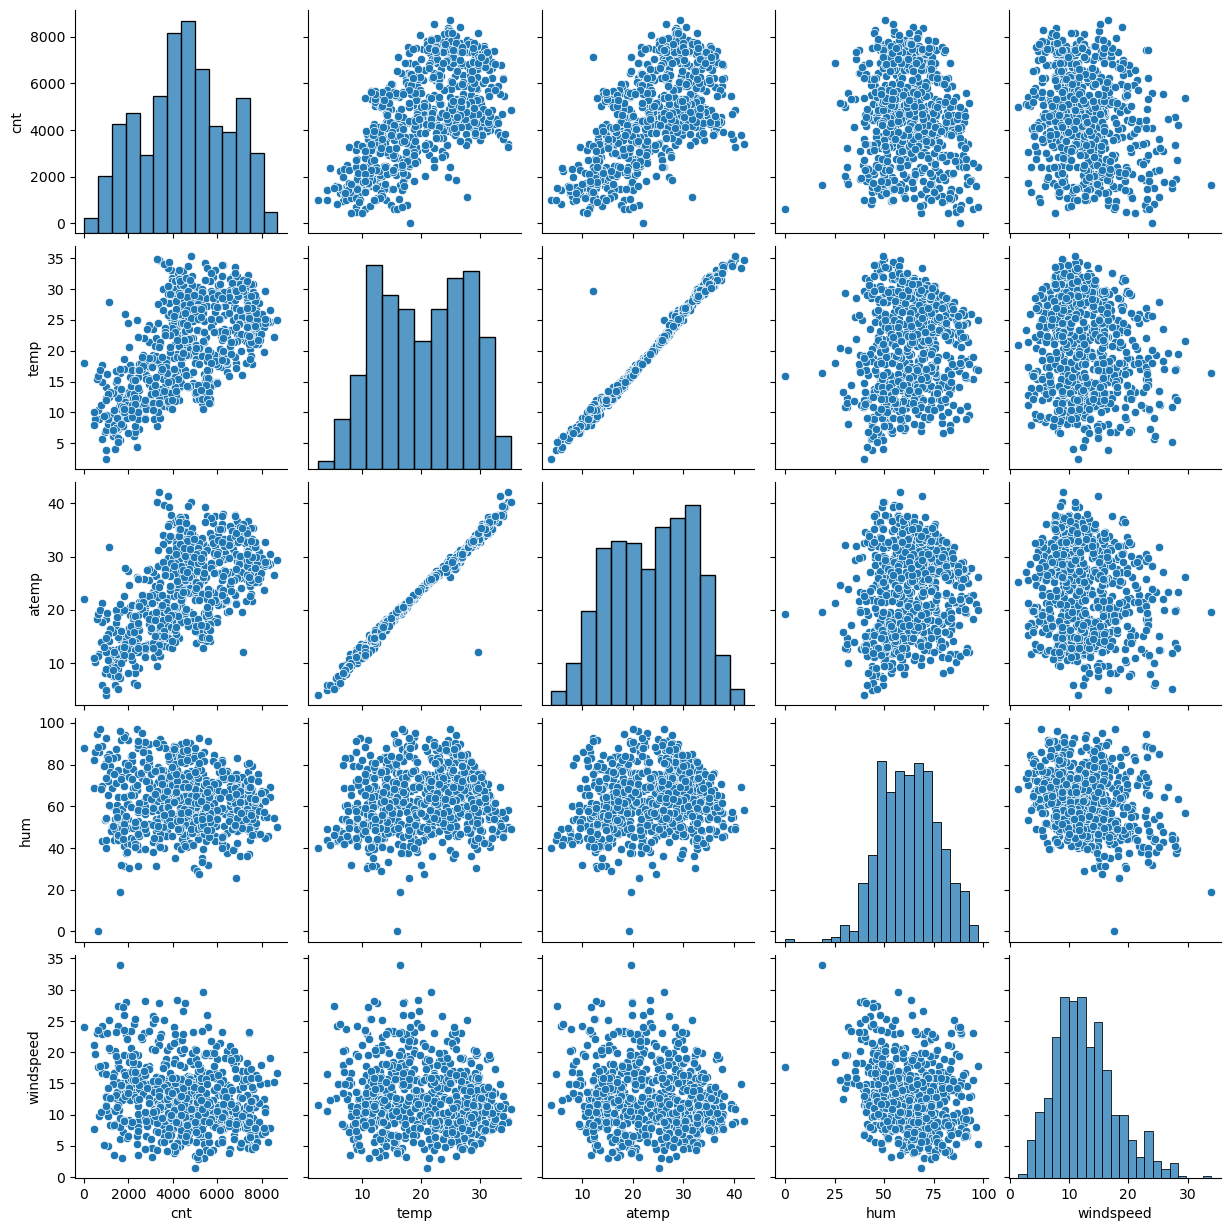

In [15]:
sns.pairplot(data=bike_demand,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Conclusion 

By visualising the numeric variables, there are some independent variables like atemp , temp etc. that show a positive correlation with the target variable cnt. We can conclude that a linear model can be considered in this case.

#### Visualising Categorical Variables - Using a Boxplot

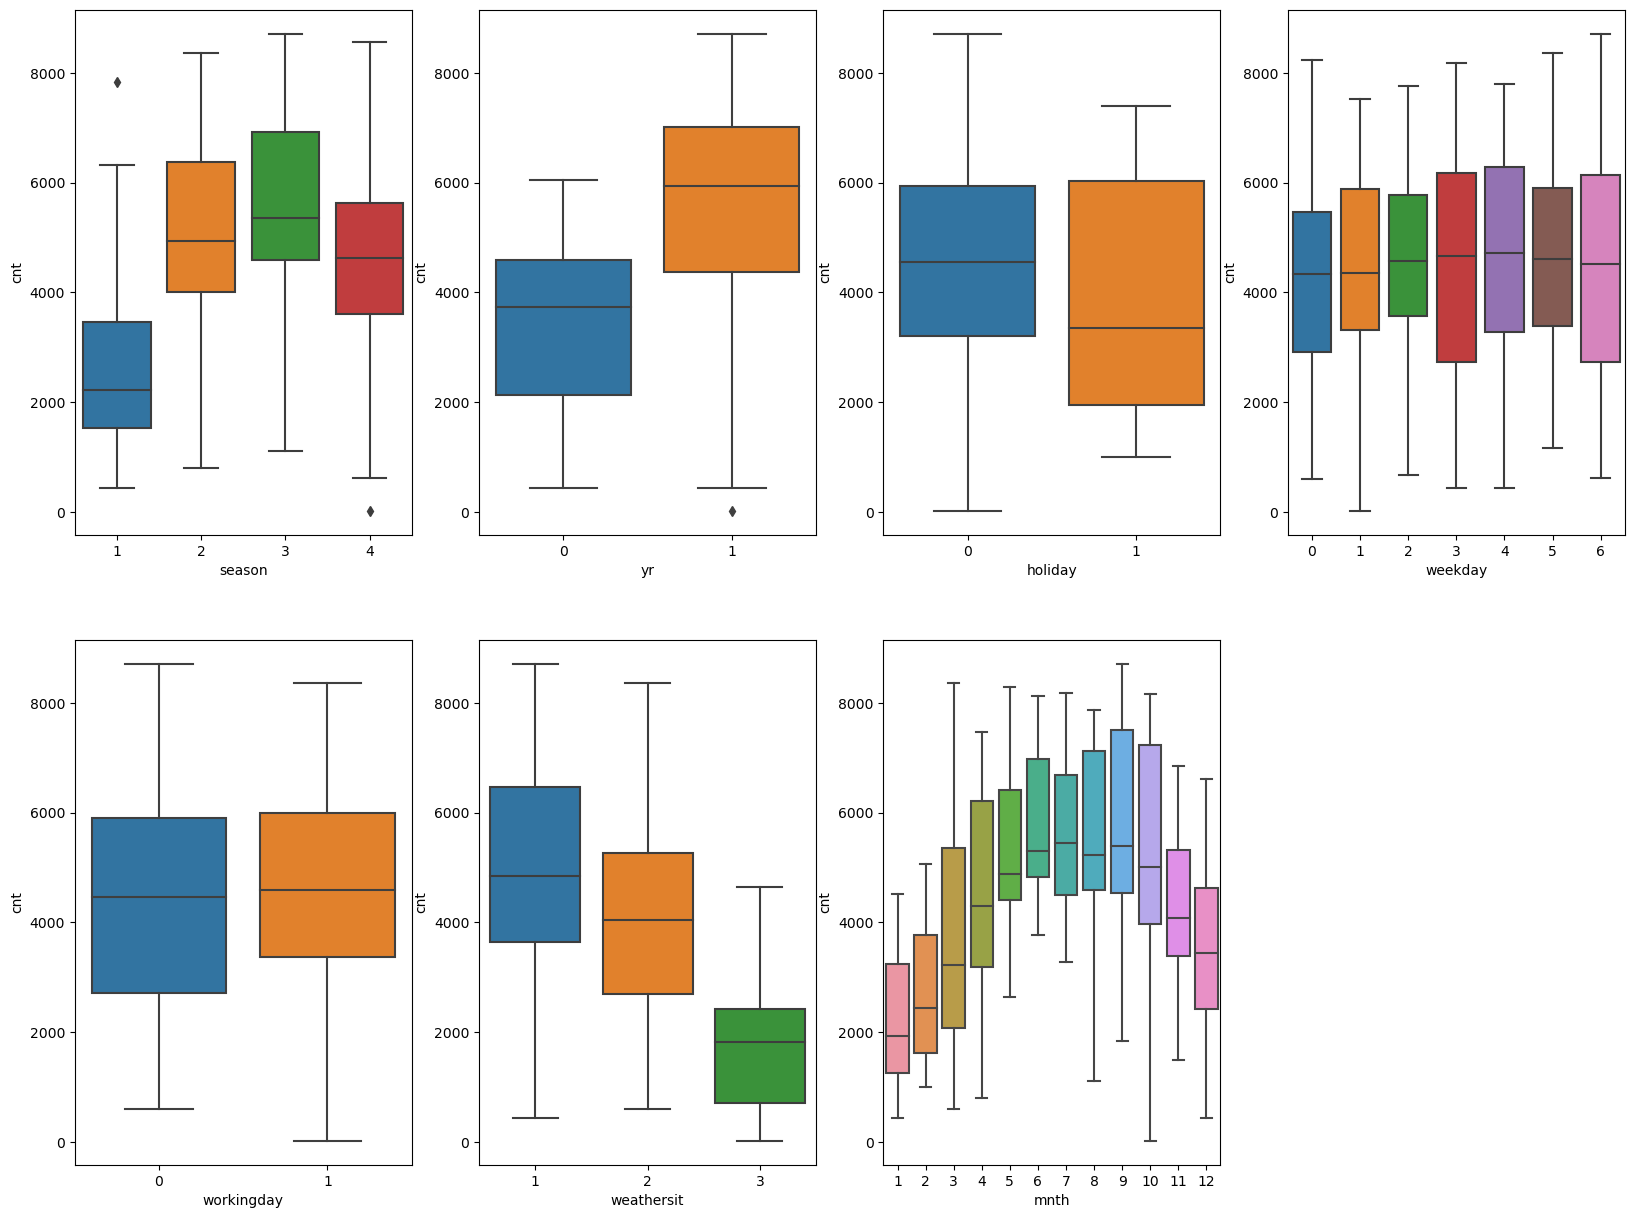

In [16]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_demand)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_demand)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_demand)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_demand)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_demand)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_demand)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_demand)
plt.show()

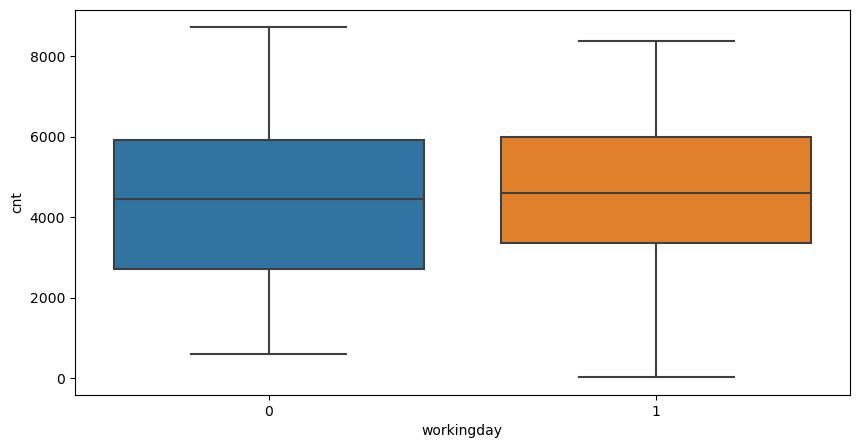

In [17]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

### Conclusions

Below are the inferences from graphs.

- The variable season's category 3 (Fall), has the highest median, which shows that the demand was high during this season. It     is least for 1 (spring). So the The count of bike sharing is least for spring and high in fall.

- During the year 2019, number of bikes shared are higher as there is a high count of users as compared to the year 2018

- The bike demand is almost constant throughout the week.

- The count of total users is in between 4000 to 6000 (~5500) during clear weather

- The count is highest in the month of September

- The count of users is less during the holidays

- The count has zero values for weather situation with category 4 ('Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog')

## Step 3: Data Preparation

Mapping the categorical values to their respective categorical string values (reference data dictionary)

In [18]:
### Converting some numeric values to categorical data
import calendar
bike_demand['mnth'] = bike_demand['mnth'].apply(lambda x: calendar.month_abbr[x])

In [19]:
## maping seasons
bike_demand.season = bike_demand.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [20]:
## mapping weathersit
bike_demand.weathersit = bike_demand.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [21]:
bike_demand.weekday = bike_demand.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [22]:
# Check the dataframe now

bike_demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Creating Dummy Variables

The variables mnth weekday season weathersit have various levels, 
for ex, weathersit has 3 levels, variable mnth has 12 levels.

We will create DUMMY variables for these 4 categorical variables namely - mnth, weekday, season & weathersit.

In [23]:
### creating dummy variables for season , mnth ,weathersit ,weekday
dummy = bike_demand[['season','mnth','weekday','weathersit']]

In [24]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [25]:
## adding dummy variables to original dataset
bike_demand = pd.concat([dummy,bike_demand],axis = 1)

In [26]:
# Now let's see the head of our dataframe.
bike_demand.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
## dropping columns for which dummy variables were created
bike_demand.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [28]:
bike_demand.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
bike_demand.shape

(730, 30)

In [30]:
bike_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 730 non-null    uint8  
 1   season_Summer                 730 non-null    uint8  
 2   season_Winter                 730 non-null    uint8  
 3   mnth_Aug                      730 non-null    uint8  
 4   mnth_Dec                      730 non-null    uint8  
 5   mnth_Feb                      730 non-null    uint8  
 6   mnth_Jan                      730 non-null    uint8  
 7   mnth_Jul                      730 non-null    uint8  
 8   mnth_Jun                      730 non-null    uint8  
 9   mnth_Mar                      730 non-null    uint8  
 10  mnth_May                      730 non-null    uint8  
 11  mnth_Nov                      730 non-null    uint8  
 12  mnth_Oct                      730 non-null    uint8  
 13  mnth_

## Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [31]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(bike_demand, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
test.shape

(219, 30)

In [33]:
train.shape


(510, 30)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 510 non-null    uint8  
 1   season_Summer                 510 non-null    uint8  
 2   season_Winter                 510 non-null    uint8  
 3   mnth_Aug                      510 non-null    uint8  
 4   mnth_Dec                      510 non-null    uint8  
 5   mnth_Feb                      510 non-null    uint8  
 6   mnth_Jan                      510 non-null    uint8  
 7   mnth_Jul                      510 non-null    uint8  
 8   mnth_Jun                      510 non-null    uint8  
 9   mnth_Mar                      510 non-null    uint8  
 10  mnth_May                      510 non-null    uint8  
 11  mnth_Nov                      510 non-null    uint8  
 12  mnth_Oct                      510 non-null    uint8  
 13  mnth

## Step 5 :Rescaling the Features 

The scaling won't impact the linear model in case of simple linear regression, But while performing multiple linear regression it might impact the model. As we can see that the value of the feature cnt has much higher values as compared to the other features like temp, atemp etc.So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling: Min-Max scaling and Standardisation (mean-0, sigma-1)


Let us use MinMax scaling.

In [35]:
scaler = MinMaxScaler()

In [36]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [37]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [38]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


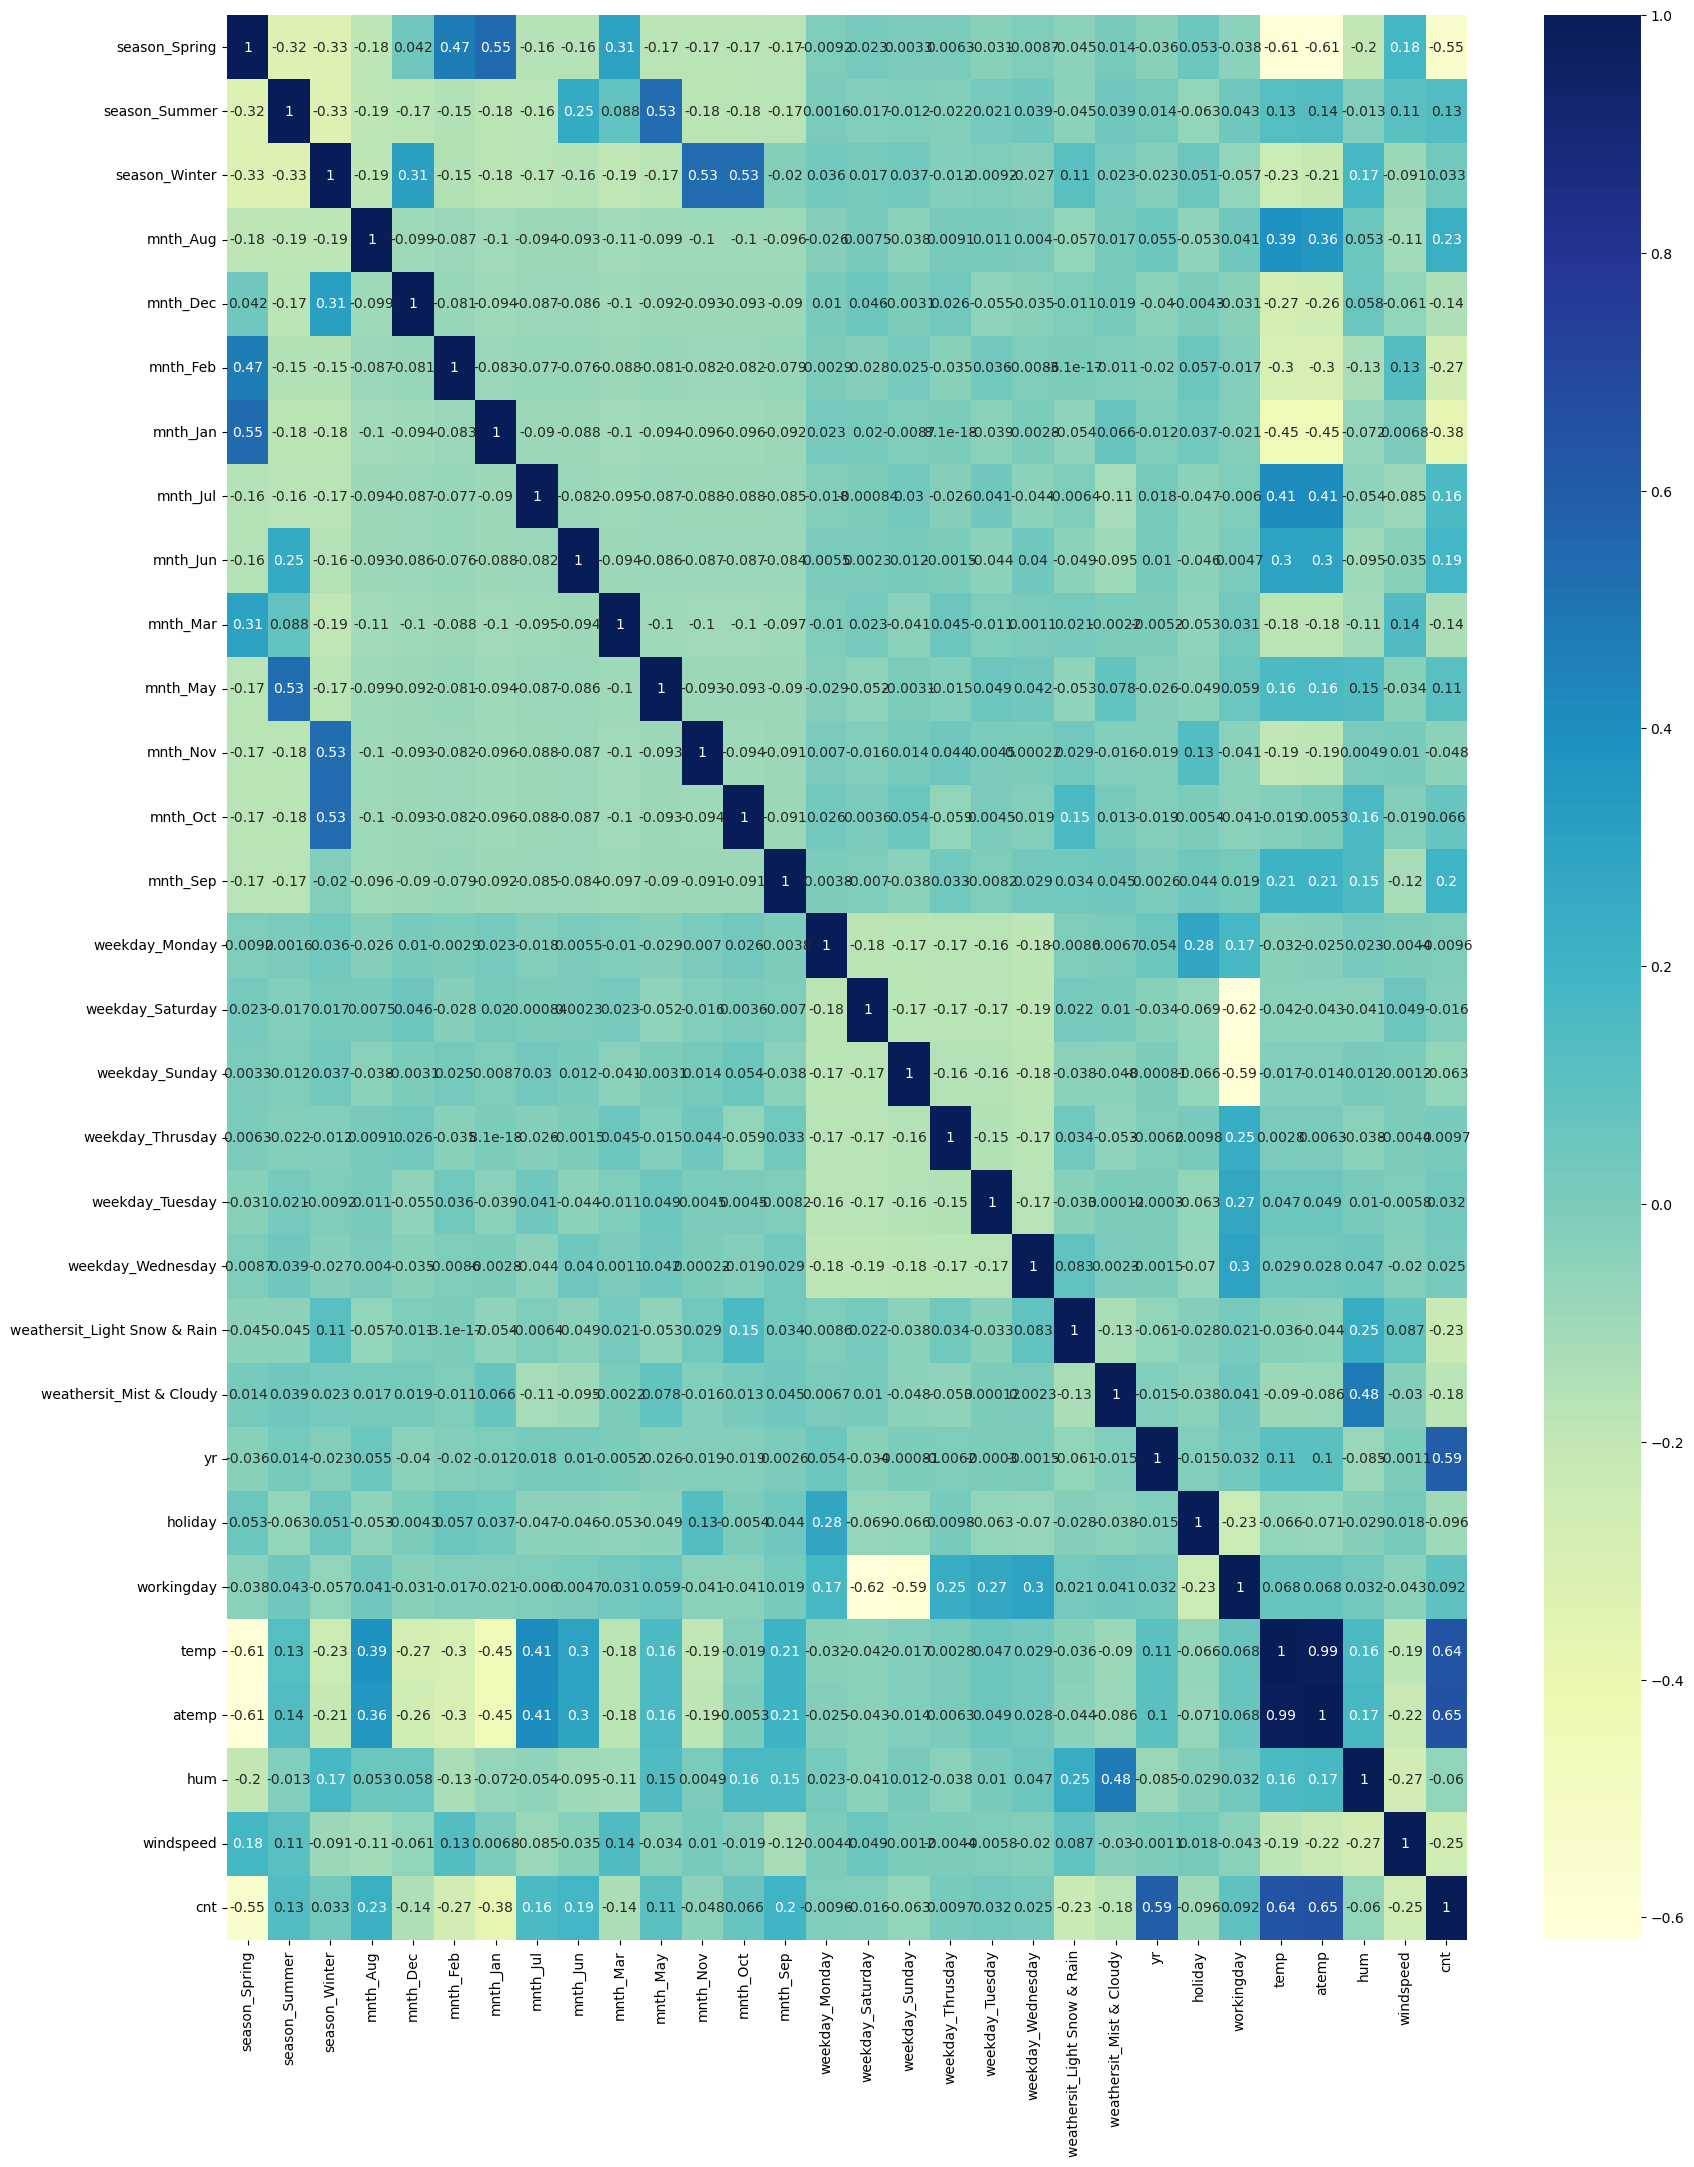

In [39]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 25))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Conclusion

As can be seen from the map, atemp and temp seems to be correlated to the target variable cnt. Since, not much can be stated about the other independent variables , hence we will build a model using all the columns.

### Dividing into X and Y sets for the model building

In [40]:
y_train = train.pop('cnt')
X_train = train

In [41]:
y_train.shape

(510,)

## Step 6: Building a linear model

Fit a regression line through the training data using `statsmodels`. In `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default. 

APPROACH USED :

We will use a mixed approach to build the model.

Here we are using RFE approach for feature selection and then we will use the statsmodel approach for building the model

In [42]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [44]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 15),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 8),
 ('weekday_Thrusday', False, 12),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [45]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [46]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday', 'atemp'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [47]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

Adding a constant variable


In [48]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [49]:
X_train_rfe.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed
653,1.0,0,0,1,0,0,0,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,1.0,0,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475


### Running the linear model

In [50]:
lm_1 = sm.OLS(y_train,X_train_rfe).fit()

# Check the parameters obtained
lm_1.params

const                           0.251042
season_Spring                  -0.050806
season_Summer                   0.049660
season_Winter                   0.094426
mnth_Jan                       -0.034326
mnth_Jul                       -0.053193
mnth_Sep                        0.081186
weekday_Saturday                0.053721
weathersit_Light Snow & Rain   -0.248777
weathersit_Mist & Cloudy       -0.057824
yr                              0.230502
holiday                        -0.058529
workingday                      0.043521
temp                            0.509836
hum                            -0.154716
windspeed                      -0.185956
dtype: float64

### Summary of the linear model

In [51]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Thu, 17 Aug 2023   Prob (F-statistic):          2.31e-191
Time:                        09:27:25   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Conclusion :

Here we see that the p-value for all the variables is < 0.05 . Hence, we keep all the columns and proceed with the model.

### Checking VIF for multicollinearity

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

In [52]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.59
1,season_Spring,5.08
13,temp,3.89
3,season_Winter,3.60
2,season_Summer,2.64
14,hum,1.92
12,workingday,1.88
7,weekday_Saturday,1.78
4,mnth_Jan,1.57
9,weathersit_Mist & Cloudy,1.57


VIF less than 5 variables needs to be dropped. 

In [53]:
# dropping `const` column as the vif is > 5
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [54]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,29.40
12,temp,17.77
11,workingday,5.31
14,windspeed,4.73
0,season_Spring,4.53
2,season_Winter,3.48
1,season_Summer,2.84
8,weathersit_Mist & Cloudy,2.29
9,yr,2.09
6,weekday_Saturday,1.98


In [55]:
# dropping `hum` column as the vif is > 5
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [56]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.67
0,season_Spring,3.08
1,season_Summer,2.33
9,yr,2.08
2,season_Winter,1.99
6,weekday_Saturday,1.97
3,mnth_Jan,1.62
4,mnth_Jul,1.59


In [57]:
# dropping `temp` column as the vif is > 5
# X_train_rfe = X_train_rfe.drop(['temp'], axis=1)

In [58]:
#vif = pd.DataFrame()
#X = X_train_rfe
#vif['Features'] = X.columns
#vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
#vif = vif.sort_values(by = "VIF", ascending = False)
#vif

### Preparing the final model

In [59]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

In [60]:
# Create a first fitted model
lm_2 = sm.OLS(y_train,X_train_lm).fit()

In [61]:
# Check the summary
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Thu, 17 Aug 2023   Prob (F-statistic):          7.33e-189
Time:                        09:27:26   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [62]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.67
0,season_Spring,3.08
1,season_Summer,2.33
9,yr,2.08
2,season_Winter,1.99
6,weekday_Saturday,1.97
3,mnth_Jan,1.62
4,mnth_Jul,1.59


### Conclusion:


#### All the columns has VIF value less than 5 and temp slight has a little more than 5 which can be ignored. Let us finalise lm_2 as the final model to proceed with the future analysis and model prediction. 

### Step 7: Residual Analysis of the train data 

Let us do residual analysis to understand if the error terms are also normally distributed as this is one of the major assumptions of linear regression. 

Let us plot the histogram for the error terms and confuct analysis

In [64]:
y_train_cnt = lm_2.predict(X_train_lm)

Text(0.5, 0, 'Errors')

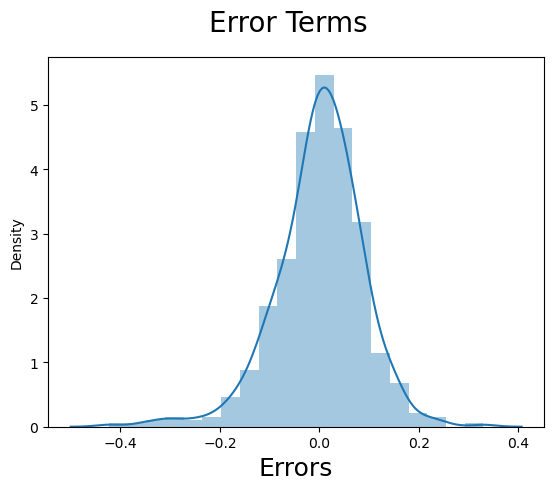

In [68]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Conclusion:

The error terms are centred around 0 and follows a normal distribution, this is as per one of the major assumption of linear regression.

### Cross-verifying the above conclusion using a qq-plot as well:

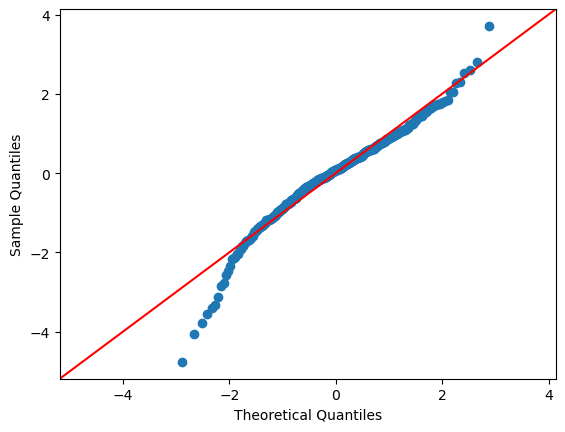

In [69]:
# Plot the qq-plot of the error terms
sm.qqplot((y_train - y_train_cnt), fit=True, line='45')
plt.show()

### Conclusion:

Most of the data points lie on the straight line , which indicates that the error terms are normally distributed.

### Step 8: Making Predictions Using the Final Model

We have fitted the model and checked the normality of error terms using residual analysis, Let us make predictions using the final model.

### Scaling the test sets

In [71]:
num_vars = ['cnt','hum','windspeed','temp','atemp']
test[num_vars] = scaler.transform(test[num_vars])

In [72]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


### Dividing into X_test and y_test

In [73]:
y_test = test.pop('cnt')
X_test = test

In [74]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

### Predicting using values used by the final model

In [75]:
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Summer                 219 non-null    uint8  
 3   season_Winter                 219 non-null    uint8  
 4   mnth_Jan                      219 non-null    uint8  
 5   mnth_Jul                      219 non-null    uint8  
 6   mnth_Sep                      219 non-null    uint8  
 7   weekday_Saturday              219 non-null    uint8  
 8   weathersit_Light Snow & Rain  219 non-null    uint8  
 9   weathersit_Mist & Cloudy      219 non-null    uint8  
 10  yr                            219 non-null    int64  
 11  holiday                       219 non-null    int64  
 12  workingday                    219 non-null    int64  
 13  temp

In [76]:
# Making predictions using the final model

y_pred = lm_2.predict(X_test)

### R-squared Caclulations

R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [77]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8045478865351157

### Conclusion:

R_squared on the test set is 0.804 
R-squared on the trained set 0.840 

Looks like these numbers are reasonable and nearly equal. This indicates that, The data model analysed and predicted using train data set is almost able to apply those inferences in test data set. 

### Step 9: Model Evaluation - Graph for actual versus predicted values for evaluation.

Text(0, 0.5, 'y_pred')

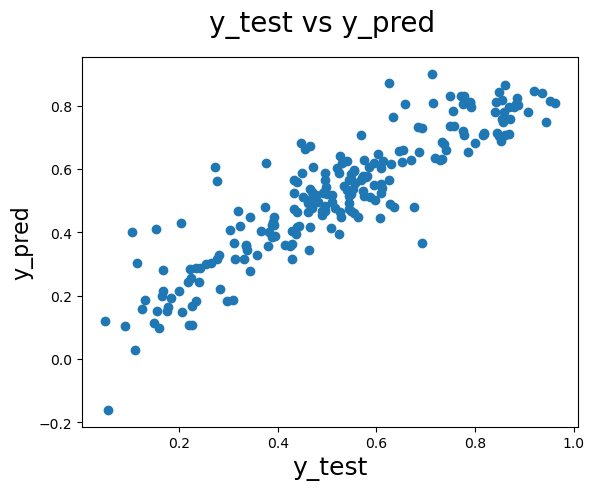

In [78]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

### Conclusion:

We can confidently conclude that the final model fit has descent prediction and can be used for further inferences.

### Best fitted line - Analyse variable names and the coefficient values for the final equation

In [80]:
param = pd.DataFrame(lm_2.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,15))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
13,temp,0.472823
10,yr,0.234361
0,const,0.173663
3,season_Winter,0.079699
6,mnth_Sep,0.075318
7,weekday_Saturday,0.058434
12,workingday,0.046502
2,season_Summer,0.043352
4,mnth_Jan,-0.038947


### Final Conclusions :

The equation for best fitted line is : 

Cnt = 0.1737 + 0.4728 X temp + 0.2343 X yr + 0.0796 X season_Winter + 0.0753 X mnth_Sep + 0.0584 X weeday_Saturday + 0.0465 X workingday + 0.0433 X season_Summer - 0.0389 X mnth_Jan - 0.0482 X mnth_Jul - 0.0561 X holiday - 0.0597 X season_Spring - 0.0826 X weathersit_Mist & Cloudy - 0.156 X windspeed - 0.291 X weathersit_Light Snow & Rain

All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of Cnt and all the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.



By looking at the R-Sqaured and adjusted R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain and predict more than 83% of bike demand.

The factors affecting the bike demand is explained by coeffiencients of the variables.

In the final model top three features contributing significantly towards explaining the demand are:
Temperature - 0.472823 - Temp is the most significant with the largest coefficient and is followed by weathersit : Light Snow, Light Rain + Mist & Cloudy (-0.291727) and year (0.234361).

From the above final module features, it indicates that, the variables temperature , season/ weather situation and month are significant in predicting the demand for shared bikes.

The rentals reduce during holidays

Bike rentals is more for the month of september

Overall, it indicates that the bike rentals are majorly affected by temperature,season and month.